How to do feature selection in Regression Problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50,n_features=5)

In [3]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.032365,-0.286906,1.155456,-0.513941,-2.309355
1,-0.412778,-0.678839,-0.499364,0.518220,-2.101707
2,0.483162,-0.200176,-0.957506,-0.267437,-0.450387
3,0.003563,1.109095,-0.009086,0.385020,1.862593
4,0.276647,-1.297385,0.327036,-0.379676,1.044748


In [4]:
y[:5]

array([-228.30198268, -238.57162702,  -72.38901819,  280.94224252,
        -11.70814363])

In [7]:
from sklearn.feature_selection import mutual_info_regression #calculate the mutual inforamtion between x values and y values
from sklearn.feature_selection import SelectKBest #extract the features according to best mutual information

In [8]:
fs= SelectKBest(score_func=mutual_info_regression, k=3) #best 3 feature out of 5
fs.fit(x,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x000002168BC88360>)

In [10]:
fs.scores_

array([0.07134747, 0.10378449, 0.        , 0.06986889, 0.        ])

In [12]:
mi_scores = pd.Series(fs.scores_, index=x.columns)
mi_scores

0    0.071347
1    0.103784
2    0.000000
3    0.069869
4    0.000000
dtype: float64

<Axes: >

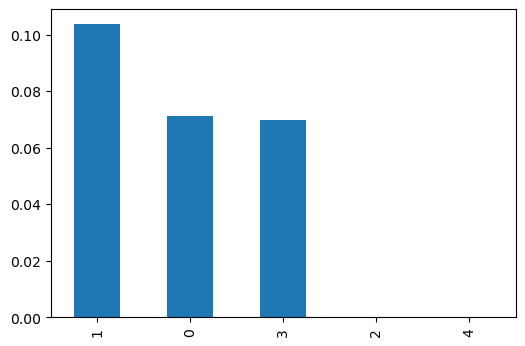

In [13]:
mi_scores.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [14]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [15]:
x.head()

,0,1,2,3,4
0,0.032365,-0.286906,1.155456,-0.513941,-2.309355
1,-0.412778,-0.678839,-0.499364,0.518220,-2.101707
2,0.483162,-0.200176,-0.957506,-0.267437,-0.450387
3,0.003563,1.109095,-0.009086,0.385020,1.862593
4,0.276647,-1.297385,0.327036,-0.379676,1.044748


In [16]:
x_selected.head()

,0,1,2
0,0.032365,-0.286906,-0.513941
1,-0.412778,-0.678839,0.518220
2,0.483162,-0.200176,-0.267437
3,0.003563,1.109095,0.385020
4,0.276647,-1.297385,-0.379676


how to use feature selection in classification problem

In [17]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [18]:
x,y =make_classification(n_samples=50, n_features=5, n_informative=2)
x = pd.DataFrame(x)

In [19]:
x.head()

,0,1,2,3,4
0,-0.741599,-1.447872,-0.627257,-0.357491,1.019497
1,-0.796458,-1.536667,-0.508856,-0.504472,-0.023802
2,0.686782,1.476711,1.803894,-0.563447,0.911325
3,0.787974,1.456276,-0.072890,0.920628,-0.167885
4,-0.219332,-0.613463,-1.853051,1.113918,-1.122758


In [20]:
y[:5]

array([0, 0, 1, 0, 1])

<Axes: >

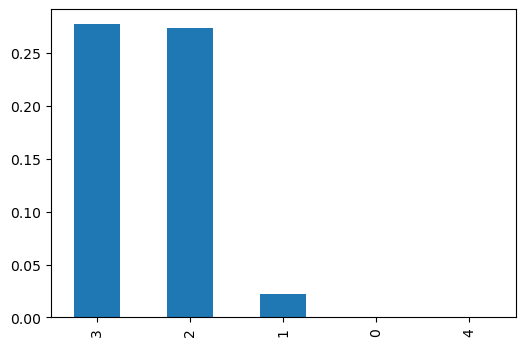

In [21]:
fs = SelectKBest(score_func=mutual_info_classif,k=3)
fs.fit(x,y)
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [22]:
selected_x = fs.fit_transform(x,y)
selected_x = pd.DataFrame(selected_x)

In [23]:
x.head()

,0,1,2,3,4
0,-0.741599,-1.447872,-0.627257,-0.357491,1.019497
1,-0.796458,-1.536667,-0.508856,-0.504472,-0.023802
2,0.686782,1.476711,1.803894,-0.563447,0.911325
3,0.787974,1.456276,-0.072890,0.920628,-0.167885
4,-0.219332,-0.613463,-1.853051,1.113918,-1.122758
